# *Auto Mobile Inusrance Analysis*

In [109]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from datetime import datetime,time
import os
import pymongo

---
## *Importing Data From MongoDB :*

*Import MongoDB Constant :*

In [110]:
from MongoDB_Constants import *
DB_NAME=DB_NAME
COLLECTION_NAME=COLLECTION_NAME
CONNECTION_URL=CONNECTION_URL

In [111]:
client=pymongo.MongoClient(CONNECTION_URL)
data_base=client[DB_NAME]
collection=data_base[COLLECTION_NAME]

In [112]:
df=pd.DataFrame(collection.find())
df.head()

,_id,veh_value,exposure,clm,numclaims,claimcst0,veh_body,veh_age,gender,area,agecat,X_OBSTAT_
0,689f41884b80e7ce6d8b3dba,1.06,0.303901,0,0,0.0,HBACK,3,F,C,2,01101 0 0 0
1,689f41884b80e7ce6d8b3dbb,1.03,0.648871,0,0,0.0,HBACK,2,F,A,4,01101 0 0 0
2,689f41884b80e7ce6d8b3dbc,3.26,0.569473,0,0,0.0,UTE,2,F,E,2,01101 0 0 0
3,689f41884b80e7ce6d8b3dbd,4.14,0.317591,0,0,0.0,STNWG,2,F,D,2,01101 0 0 0
4,689f41884b80e7ce6d8b3dbe,0.72,0.648871,0,0,0.0,HBACK,4,F,C,2,01101 0 0 0


In [113]:
df=df.drop("_id",axis=1)

---
## *Data Shape*

In [114]:
print(df.shape)
print("The data set has",df.shape[0],"rows, and",df.shape[1],"features")

(67856, 11)
The data set has 67856 rows, and 11 features


---
## *Data types*

In [115]:
df.dtypes

veh_value    float64
exposure     float64
clm            int64
numclaims      int64
claimcst0    float64
veh_body      object
veh_age        int64
gender        object
area          object
agecat         int64
X_OBSTAT_     object
dtype: object

---
## *Data Info*

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67856 entries, 0 to 67855
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   veh_value  67856 non-null  float64
 1   exposure   67856 non-null  float64
 2   clm        67856 non-null  int64  
 3   numclaims  67856 non-null  int64  
 4   claimcst0  67856 non-null  float64
 5   veh_body   67856 non-null  object 
 6   veh_age    67856 non-null  int64  
 7   gender     67856 non-null  object 
 8   area       67856 non-null  object 
 9   agecat     67856 non-null  int64  
 10  X_OBSTAT_  67856 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 5.7+ MB


## *Data Cleaning :*  
*Na-Values & Duplicated rows*

In [117]:
print("The Total Number of Null Values are : ", df.isna().sum().sum())
print("The Total Number of duplicated rows are : ", df.duplicated().sum())

The Total Number of Null Values are :  0
The Total Number of duplicated rows are :  378


In [118]:
df=df.drop_duplicates()
print("The Total Number of duplicated rows are : ", df.duplicated().sum())

The Total Number of duplicated rows are :  0


*Data Transformation*

*Drop not-needed cols : [X_OBSTAT_]*  
*Remove Data with sum insured <= 0 :*  
*Convert veh_value into 3decimle value*  
*Rename & capitalize columns*  

In [119]:
df=df.drop("X_OBSTAT_",axis=1)
df=df[df["veh_value"] != 0]
df["veh_value"]=df["veh_value"]*10000
df=df.rename(columns={'clm': 'Claim_recorded',
                       'numclaims': 'number_of_Recorded_claims',
                       'claimcst0':'Claims_cost',
                       'agecat':'age_category'
                       })

df.columns=df.columns.str.capitalize()                       

In [120]:
df.head()

,Veh_value,Exposure,Claim_recorded,Number_of_recorded_claims,Claims_cost,Veh_body,Veh_age,Gender,Area,Age_category
0,10600.0,0.303901,0,0,0.0,HBACK,3,F,C,2
1,10300.0,0.648871,0,0,0.0,HBACK,2,F,A,4
2,32600.0,0.569473,0,0,0.0,UTE,2,F,E,2
3,41400.0,0.317591,0,0,0.0,STNWG,2,F,D,2
4,7200.0,0.648871,0,0,0.0,HBACK,4,F,C,2


## *Features Engineering :*

*1. Features Generation*

*Creating copy of the data set with the following new Features:*  
* *1. Severty --> Average Claims Cost per Claim*  
* *2. Frequency*  

In [131]:
df_copy=df.copy()
df_copy["Severity"]=np.round(np.where(df_copy['Number_of_recorded_claims'] != 0,
                                       df_copy['Claims_cost'] / df_copy['Number_of_recorded_claims'], 0))
df_copy.head()

,Veh_value,Exposure,Claim_recorded,Number_of_recorded_claims,Claims_cost,Veh_body,Veh_age,Gender,Area,Age_category,Severity
0,10600.0,0.303901,0,0,0.0,HBACK,3,F,C,2,0.0
1,10300.0,0.648871,0,0,0.0,HBACK,2,F,A,4,0.0
2,32600.0,0.569473,0,0,0.0,UTE,2,F,E,2,0.0
3,41400.0,0.317591,0,0,0.0,STNWG,2,F,D,2,0.0
4,7200.0,0.648871,0,0,0.0,HBACK,4,F,C,2,0.0


---
## *EDA --Exploration data analysis ---> Descriptive Analysis*

*Numerical Features*

In [132]:
df_copy.describe()

,Veh_value,Exposure,Claim_recorded,Number_of_recorded_claims,Claims_cost,Veh_age,Age_category,Severity
count,67426.000000,67426.000000,67426.000000,67426.000000,67426.000000,67426.000000,67426.000000,67426.000000
mean,17784.800136,0.467511,0.068490,0.073102,137.876091,2.673524,3.484857,131.175170
std,12050.111165,0.289198,0.252587,0.278741,1058.553493,1.067748,1.425937,1026.627756
min,1800.000000,0.002738,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,10100.000000,0.219028,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,15000.000000,0.443532,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
75%,21600.000000,0.706366,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000
max,345600.000000,0.999316,1.000000,4.000000,55922.129880,4.000000,6.000000,55922.000000


*Visualzing Numerical Features*

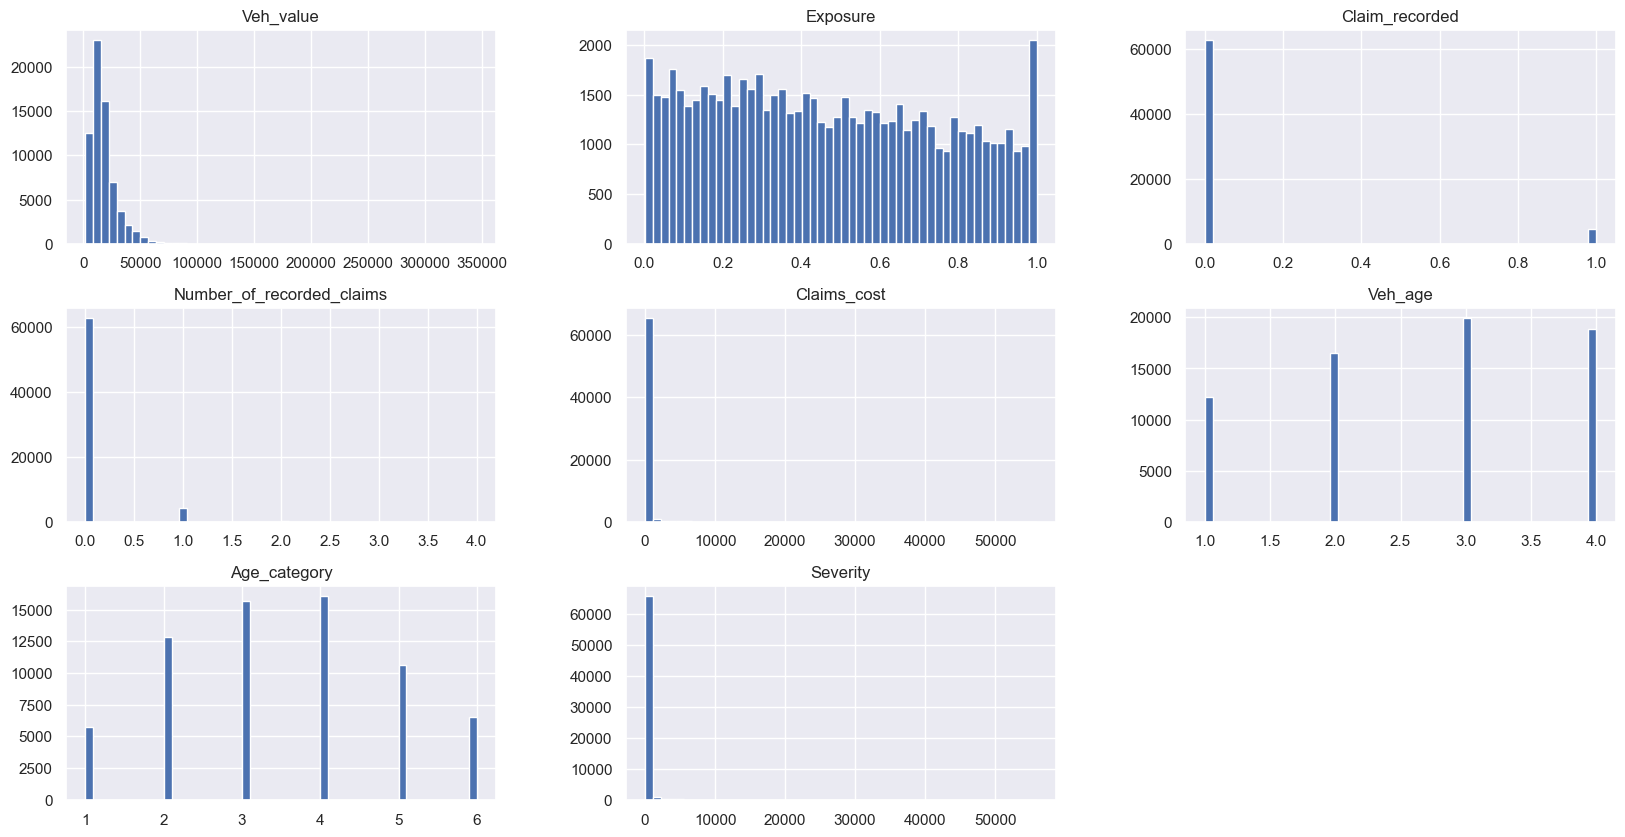

In [133]:
%matplotlib inline 
import matplotlib.pyplot as plt
df_copy.hist(bins=50, figsize=(20,10))
plt.show()

*Insights Numerical Features*

*Categotical Features*  

In [134]:
df_copy.describe(include="object")

,Veh_body,Gender,Area
count,67426,67426,67426
unique,13,2,6
top,SEDAN,F,C
freq,22106,38344,20394


*Visualzing Categotical Features*

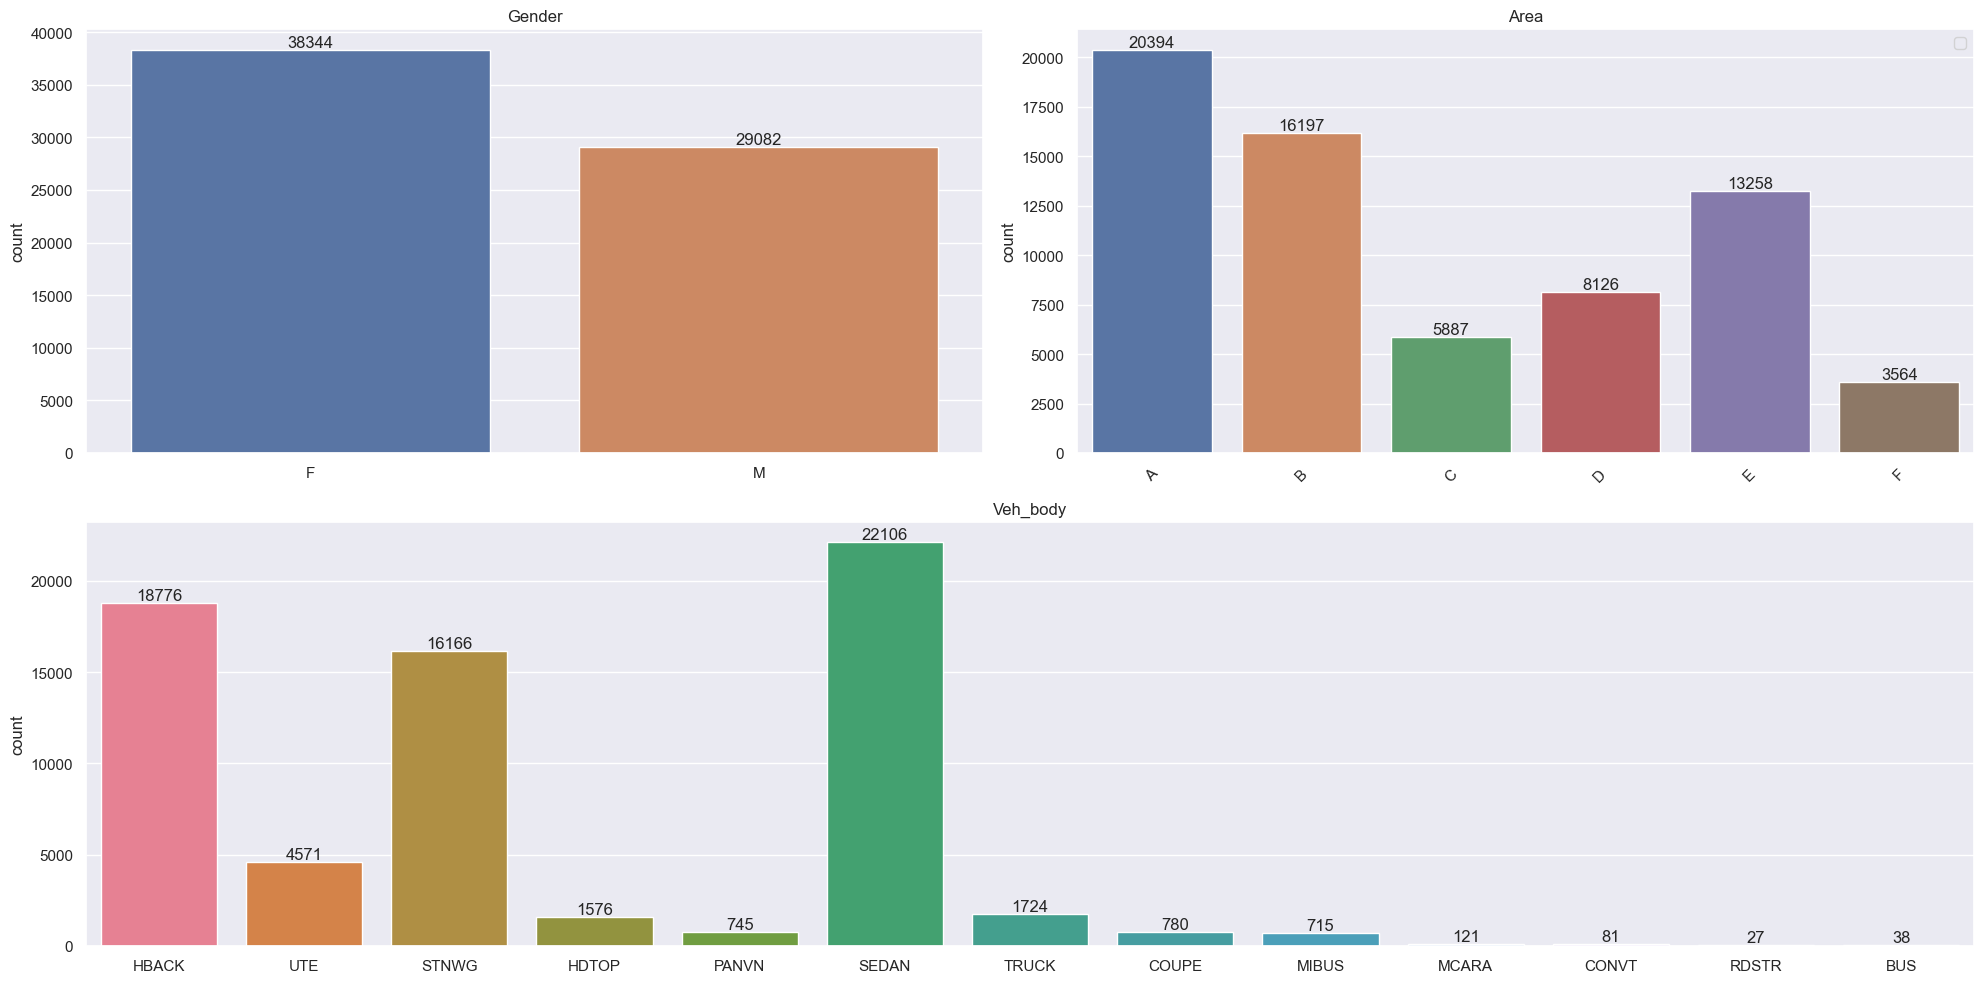

In [135]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
sns.countplot(data=df_copy, x="Gender", ax=ax1,hue='Gender')
ax1.set_title("Gender")
ax1.set_xlabel("")
for container in ax1.containers:
    ax1.bar_label(container)

ax2 = fig.add_subplot(gs[0, 1])
Area_order=['A','B','C','D','E','F']
sns.countplot(data=df_copy, x="Area", ax=ax2,hue='Area')
ax2.set_xticklabels(Area_order, rotation=45)
ax2.legend("")
ax2.set_title("Area")
ax2.set_xlabel("")
for container in ax2.containers:
    ax2.bar_label(container)

ax3 = fig.add_subplot(gs[1, :])
sns.countplot(data=df_copy, x="Veh_body", ax=ax3,hue='Veh_body')
ax3.set_title("Veh_body")
ax3.set_xlabel("")
for container in ax3.containers:
    ax3.bar_label(container)   

plt.tight_layout()
plt.show()

*Insights Categotical Features*

*we can see that some features are numerical, but thay can also be treated as categorical ,we weill deal weith them by appying groub_by*

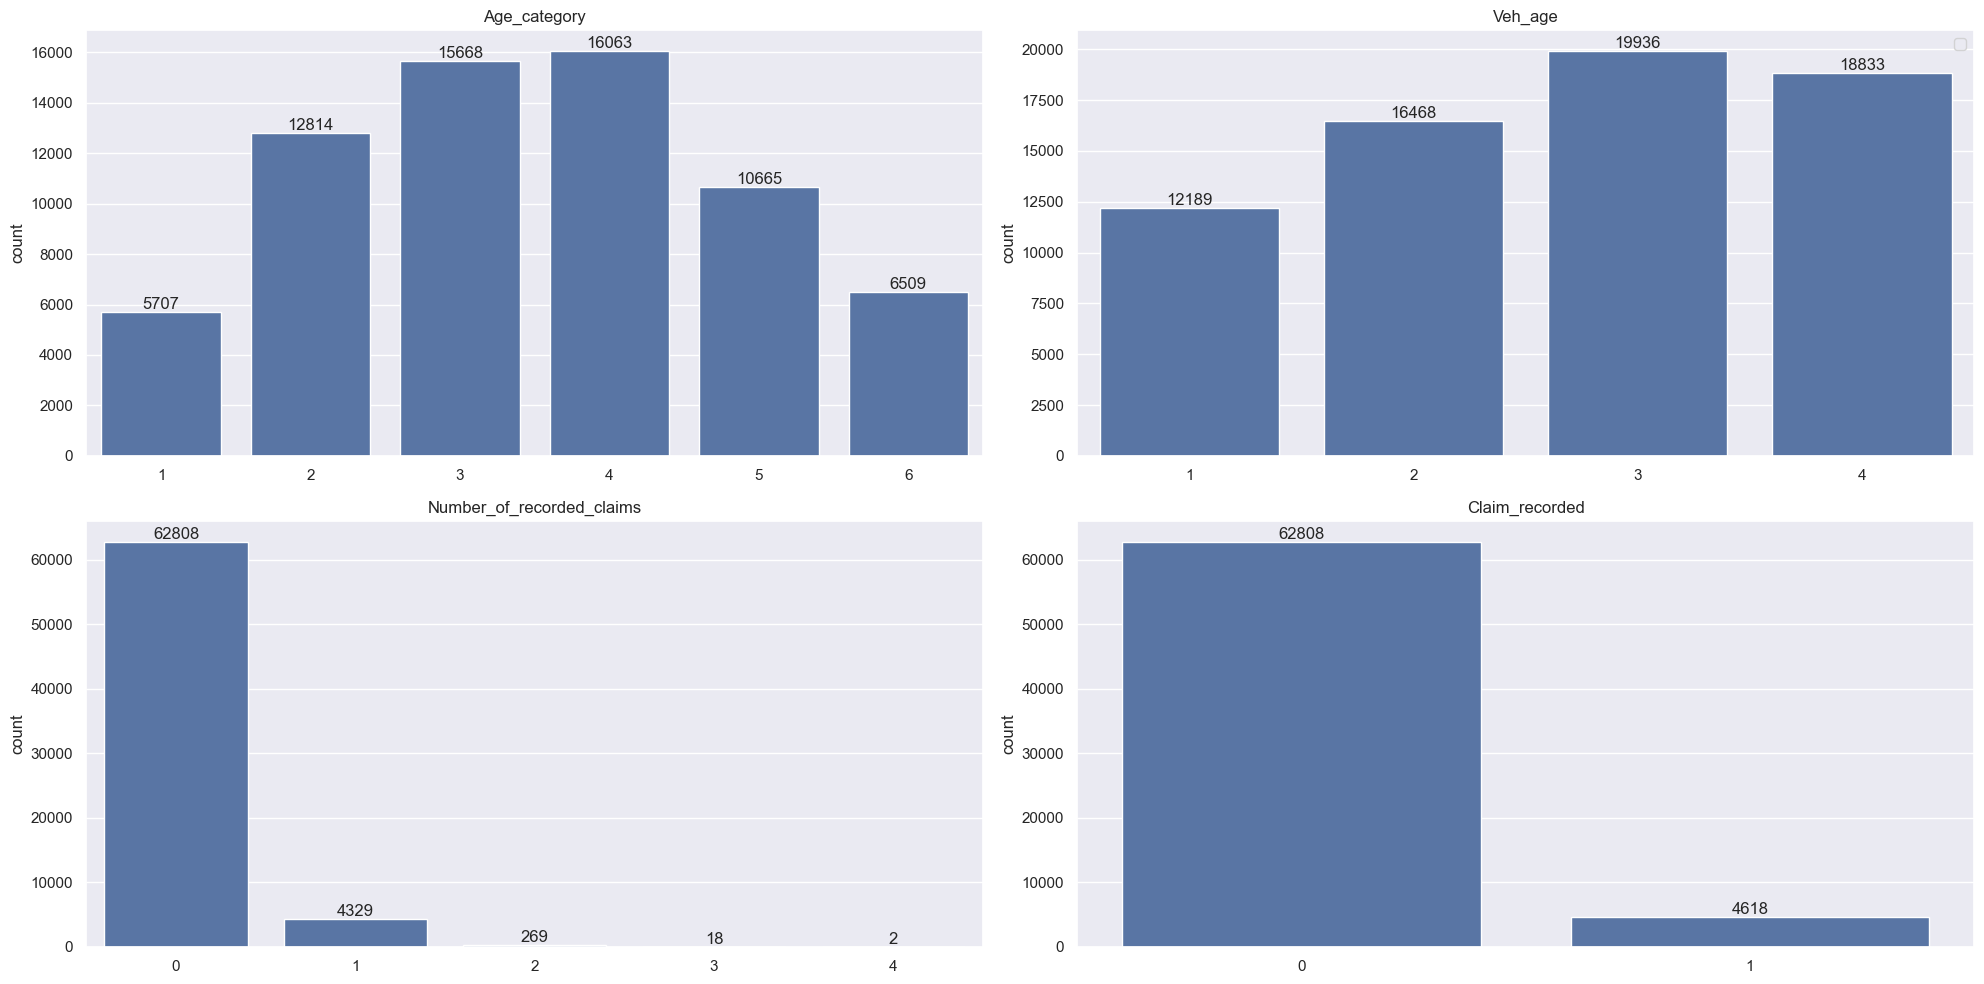

In [136]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(data=df_copy.groupby('Age_category')['Age_category'].value_counts().to_frame().reset_index(),
            x="Age_category",y="count",ax=ax1)
ax1.set_title("Age_category")
ax1.set_xlabel("")
for container in ax1.containers:
    ax1.bar_label(container)

ax2 = fig.add_subplot(gs[0, 1])
Area_order=['A','B','C','D','E','F']
sns.barplot(data=df_copy.groupby('Veh_age')['Veh_age'].value_counts().to_frame().reset_index(),
            x="Veh_age",y="count",ax=ax2)
ax2.legend("")
ax2.set_title("Veh_age")
ax2.set_xlabel("")
for container in ax2.containers:
    ax2.bar_label(container)

ax3 = fig.add_subplot(gs[1, 0])
sns.barplot(data=df_copy.groupby('Number_of_recorded_claims')['Number_of_recorded_claims'].value_counts().to_frame().reset_index(),
            x="Number_of_recorded_claims",y="count",ax=ax3)
ax3.set_title("Number_of_recorded_claims")
ax3.set_xlabel("")
for container in ax3.containers:
    ax3.bar_label(container) 

ax4 = fig.add_subplot(gs[1, 1])
sns.barplot(data=df_copy.groupby('Claim_recorded')['Claim_recorded'].value_counts().to_frame().reset_index(),
            x="Claim_recorded",y="count",ax=ax4)
ax4.set_title("Claim_recorded")
ax4.set_xlabel("")
for container in ax4.containers:
    ax4.bar_label(container)        

plt.tight_layout()
plt.show()

---
## *Inferential Data Analysis*

*We will focus only on the feature [Claim_recorded] as target feature*

In [165]:
from scipy.stats import chi2_contingency,spearmanr,mannwhitneyu

*1. Chi-square test*

* *chi2_contingency --> categorical predictor vs binary target :*

In [166]:
def chi2_contingency_func(Dataset:pd.DataFrame,Binarytarget:str,CategoricalFeature:str):
    contingency_table=pd.crosstab(Dataset[Binarytarget],Dataset[CategoricalFeature])
    chi2, p_chi, dof, expected = chi2_contingency(contingency_table)
    print(f"W = {chi2:.3f}, p = {p_chi:.3f}")
    if p_chi < 0.05:
        print(f"Reject H₀ → There is significant association between {Binarytarget} & {CategoricalFeature}")
    else:
        print(f"Fail to reject H₀ → No significant association between {Binarytarget} & {CategoricalFeature}")
    plt.figure(figsize=(20,5))
    sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5)
    plt.title('Contingency Table Heatmap')
    plt.show()

W = 0.391, p = 0.532
Fail to reject H₀ → No significant association between Claim_recorded & Gender


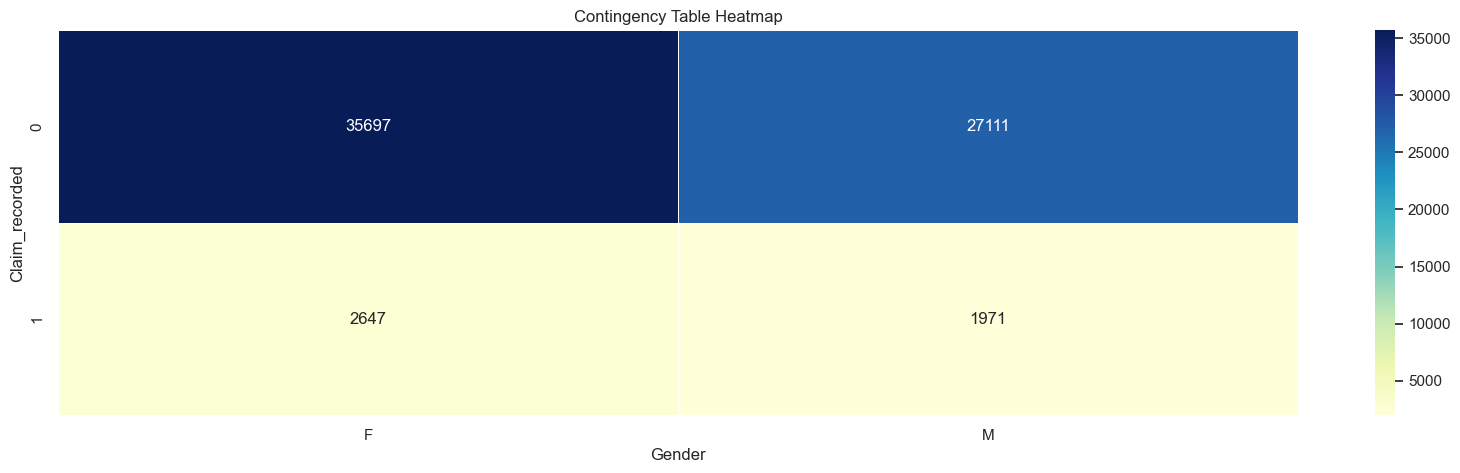

In [167]:
chi2_contingency_func(Dataset=df_copy,Binarytarget="Claim_recorded",CategoricalFeature="Gender")

W = 18.278, p = 0.003
Reject H₀ → There is significant association between Claim_recorded & Area


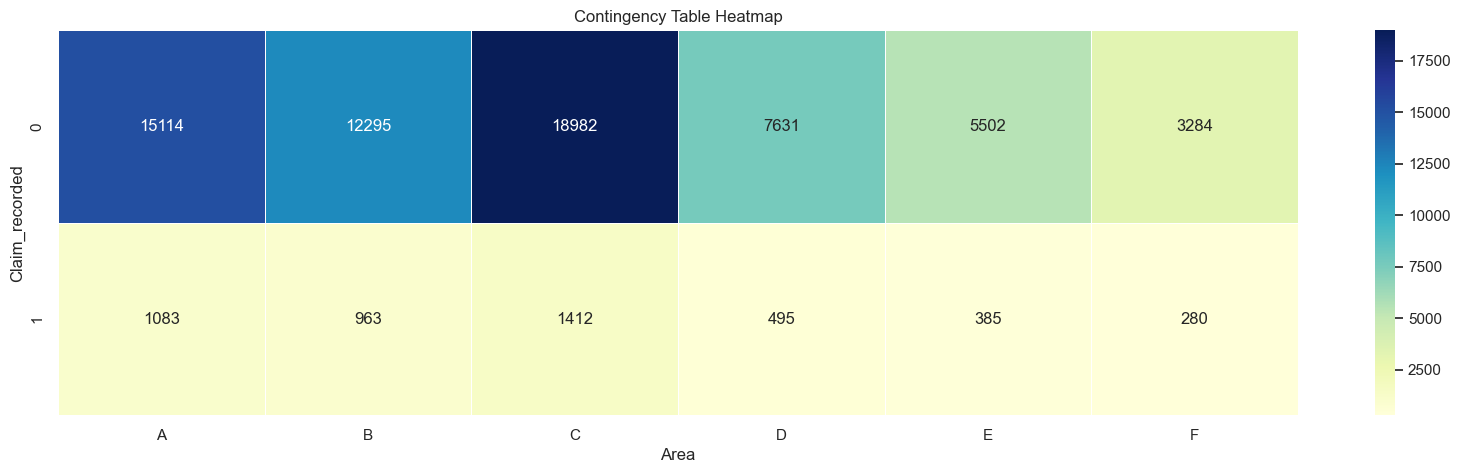

In [168]:
chi2_contingency_func(Dataset=df_copy,Binarytarget="Claim_recorded",CategoricalFeature="Area")

W = 40.815, p = 0.000
Reject H₀ → There is significant association between Claim_recorded & Veh_body


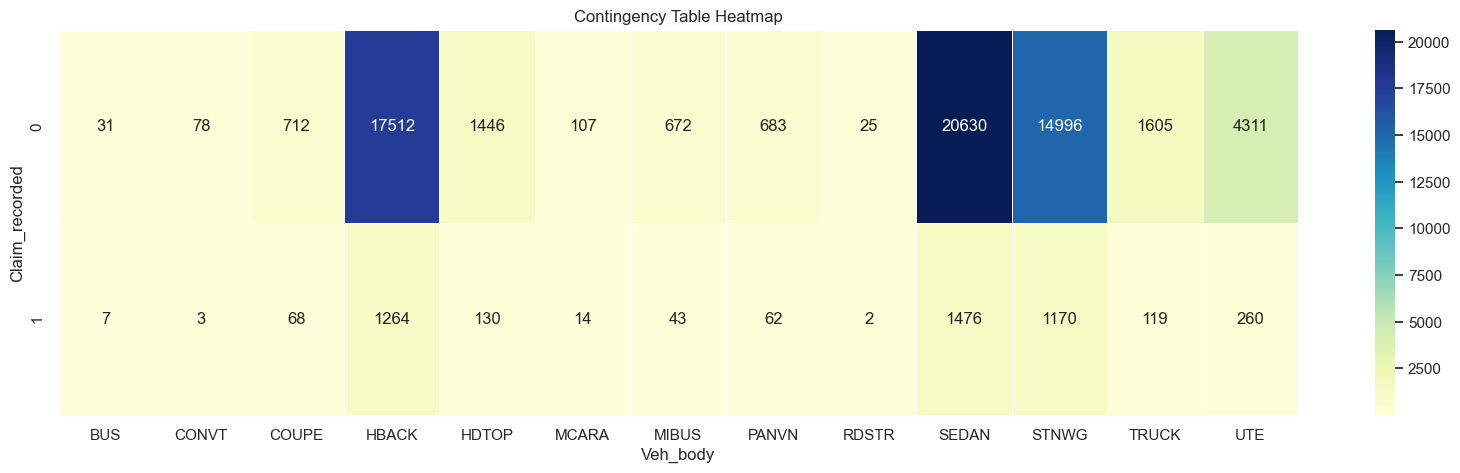

In [169]:
chi2_contingency_func(Dataset=df_copy,Binarytarget="Claim_recorded",CategoricalFeature="Veh_body")

*2. Spearman correlation*

* *Spearman’s rank correlation (ordinal predictor vs binary target)*
* *A monotonic relationship exists between two variables when their values tend to move in the same relative direction. This means that as one variable increases, the other variable either consistently increases or consistently decreases, though not necessarily at a constant rate*

In [170]:
def spearmanr_func(Dataset:pd.DataFrame,Binarytarget:str,OrdinalFeature:str):
    spearman_corr, p_spear = spearmanr(Dataset[Binarytarget],Dataset[OrdinalFeature])
    prob_df = df.groupby(OrdinalFeature)[Binarytarget].mean().reset_index()
    prob_df.rename(columns={Binarytarget: 'prob_target_1'}, inplace=True)  

    print(f"W = {spearman_corr:.3f}, p = {p_spear:.3f}")
    if p_spear < 0.05:
        print(f"Reject H₀ → There is significant monotonic relationship between {Binarytarget} & {OrdinalFeature}")
    else:
        print(f"Fail to reject H₀ → No significant monotonic relationship between {Binarytarget} & {OrdinalFeature}")

    plt.figure(figsize=(20,5))
    ax=sns.heatmap(prob_df.set_index(OrdinalFeature).T, annot=True, cmap="YlGnBu", cbar=True)
    ax.set_title("Probability of Binary Target=1 by Ordinal Feature")
    ax.set_xlabel("Ordinal Feature")
    ax.set_ylabel("Probability")
    plt.tight_layout()
    plt.show()        

W = -0.030, p = 0.000
Reject H₀ → There is significant monotonic relationship between Claim_recorded & Age_category


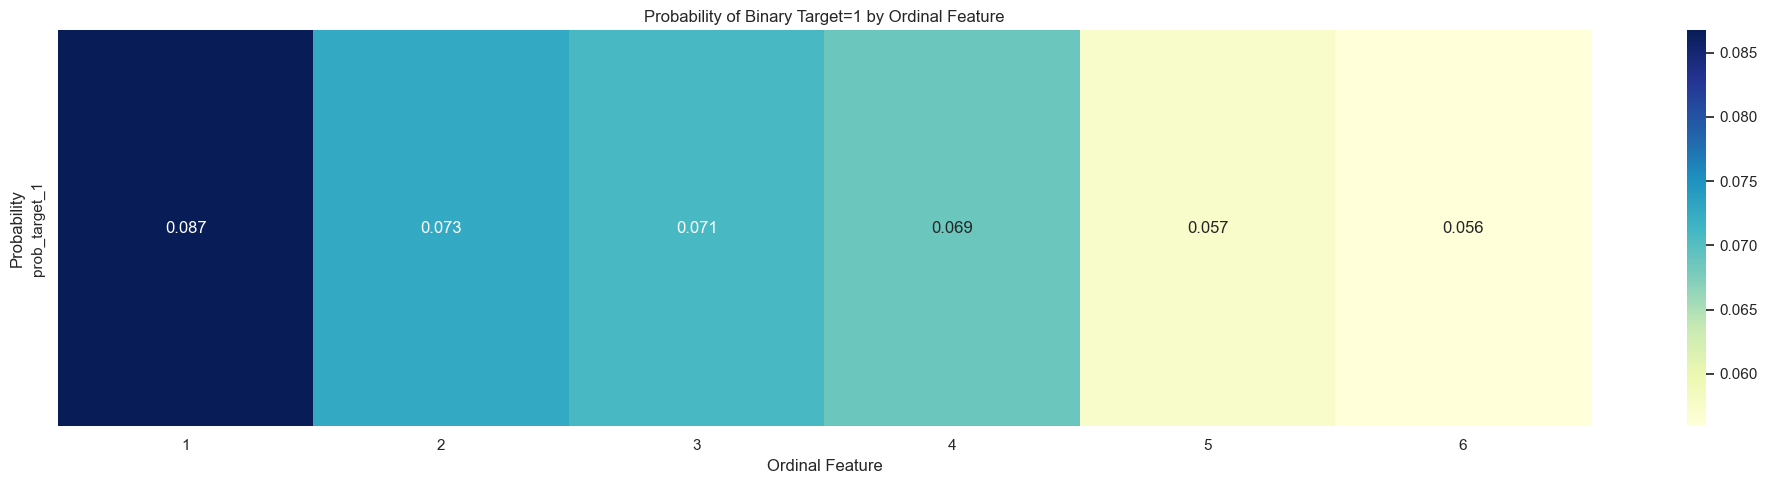

In [171]:
spearmanr_func(Dataset=df_copy,Binarytarget="Claim_recorded",OrdinalFeature='Age_category')

W = 1.000, p = 0.000
Reject H₀ → There is significant monotonic relationship between Claim_recorded & Number_of_recorded_claims


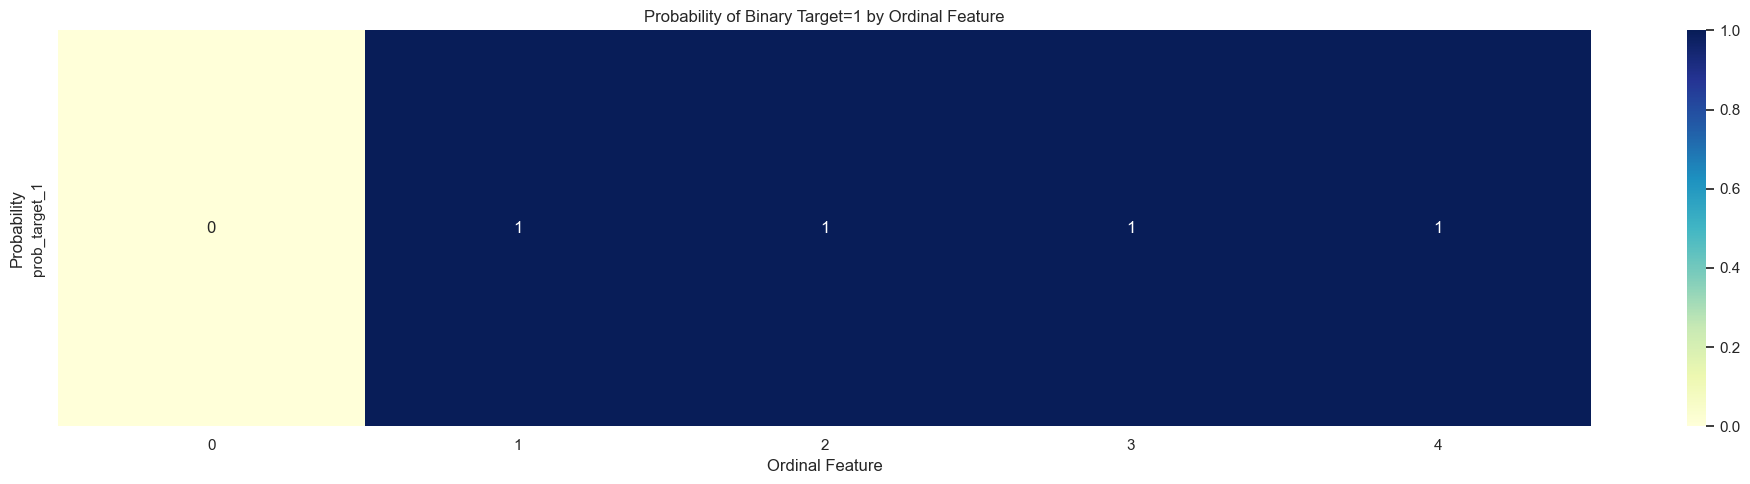

In [172]:
spearmanr_func(Dataset=df_copy,Binarytarget="Claim_recorded",OrdinalFeature='Number_of_recorded_claims')

W = -0.013, p = 0.000
Reject H₀ → There is significant monotonic relationship between Claim_recorded & Veh_age


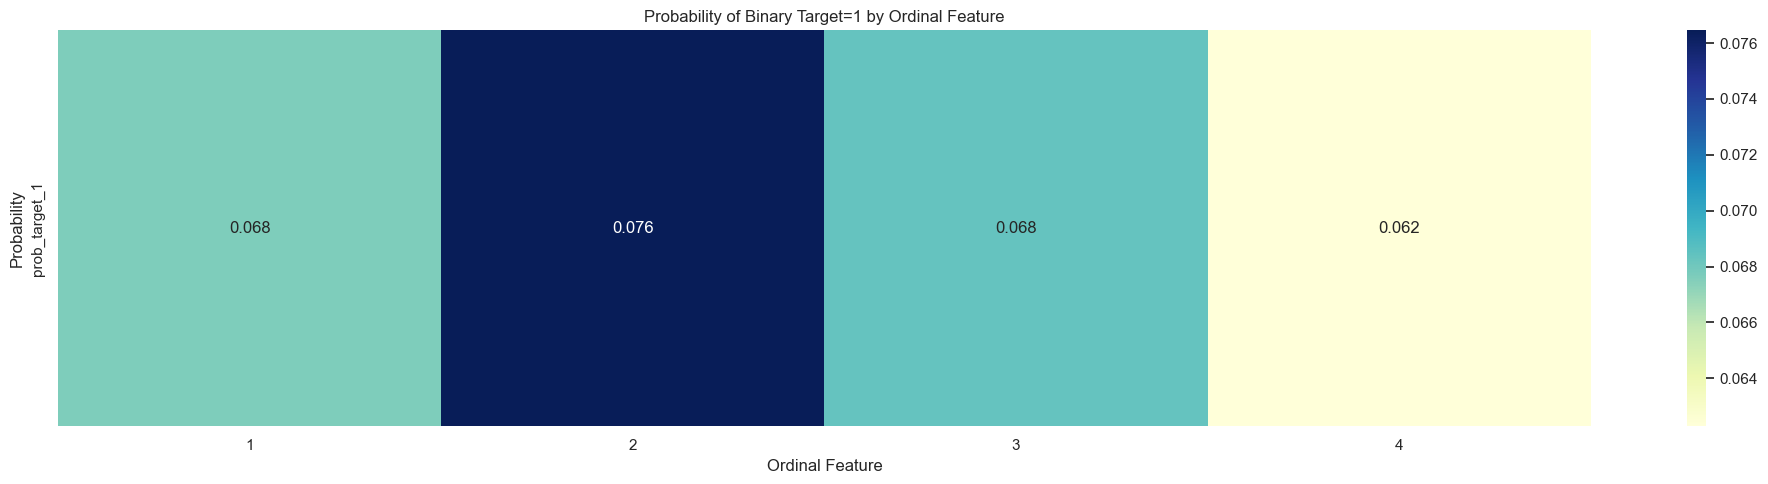

In [173]:
spearmanr_func(Dataset=df_copy,Binarytarget="Claim_recorded",OrdinalFeature='Veh_age')

*3. Mann–Whitney U test*

* *Mann–Whitney U test (numerical predictor vs binary target)*

In [174]:
def mannwhitneyu_func(Dataset:pd.DataFrame,Binarytarget:str,NumericalFeature:str):
    group1 = Dataset[NumericalFeature][Dataset[Binarytarget] == 0]
    group2 = Dataset[NumericalFeature][Dataset[Binarytarget]  == 1]
    u_stat, p_mw = mannwhitneyu(group1, group2, alternative='two-sided')
    print(f"W = {u_stat:.3f}, p = {p_mw:.3f}")
    if p_mw < 0.05:
        print(f"Reject H₀ → There is significant distribution difference between {Binarytarget} & {NumericalFeature}")
    else:
        print(f"Fail to reject H₀ → No significant distribution difference between {Binarytarget} & {NumericalFeature}")

    fig, axes = plt.subplots(1, 2, figsize=(20, 5))
    sns.histplot(x=NumericalFeature, hue=Binarytarget, data=Dataset, kde=True,ax=axes[0])
    sns.violinplot(x=Binarytarget, y=NumericalFeature, data=Dataset, inner="box", palette="pastel",ax=axes[1])

    axes[0].set_title(f"Mann–Whitney U Test\nU = {u_stat:.2f}, p = {p_mw:.4f}")
    axes[0].set_xlabel("Numerical Feature")
    axes[0].set_ylabel("Numerical Feature count")

    axes[1].set_title(f"Mann–Whitney U Test\nU = {u_stat:.2f}, p = {p_mw:.4f}")
    axes[1].set_xlabel("Binary Target")
    axes[1].set_ylabel("Numerical Feature");

W = 0.000, p = 0.000
Reject H₀ → There is significant distribution difference between Claim_recorded & Claims_cost


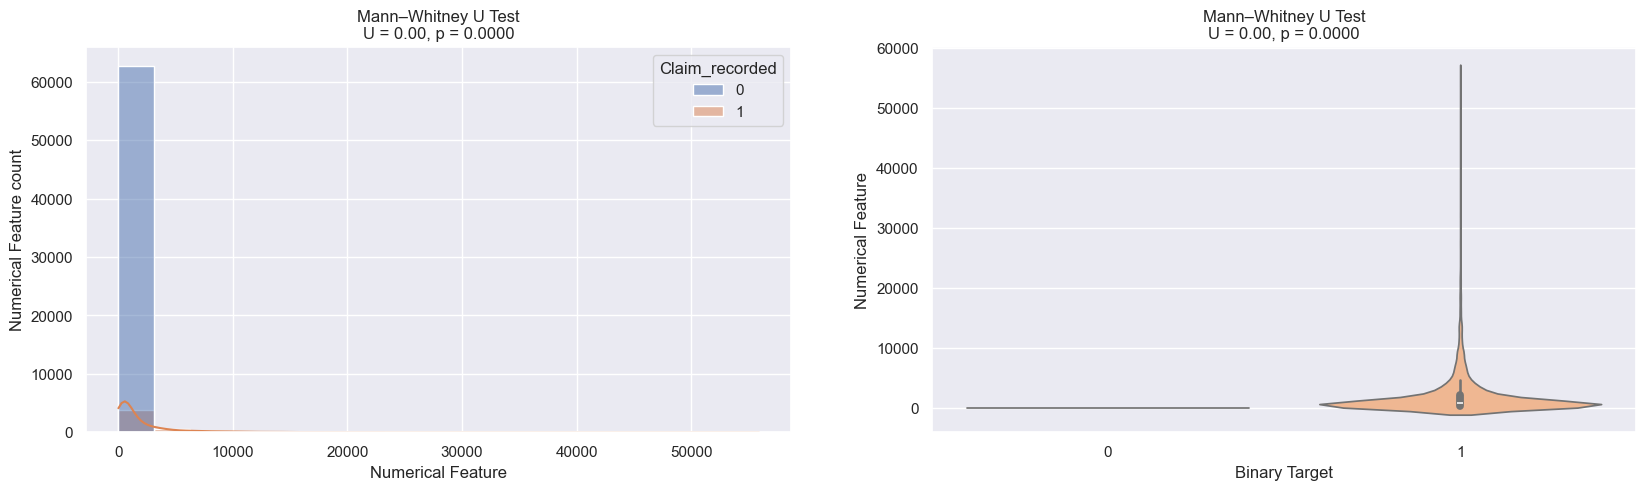

In [175]:
mannwhitneyu_func(Dataset=df_copy,Binarytarget="Claim_recorded",NumericalFeature="Claims_cost")

W = 100401011.500, p = 0.000
Reject H₀ → There is significant distribution difference between Claim_recorded & Exposure


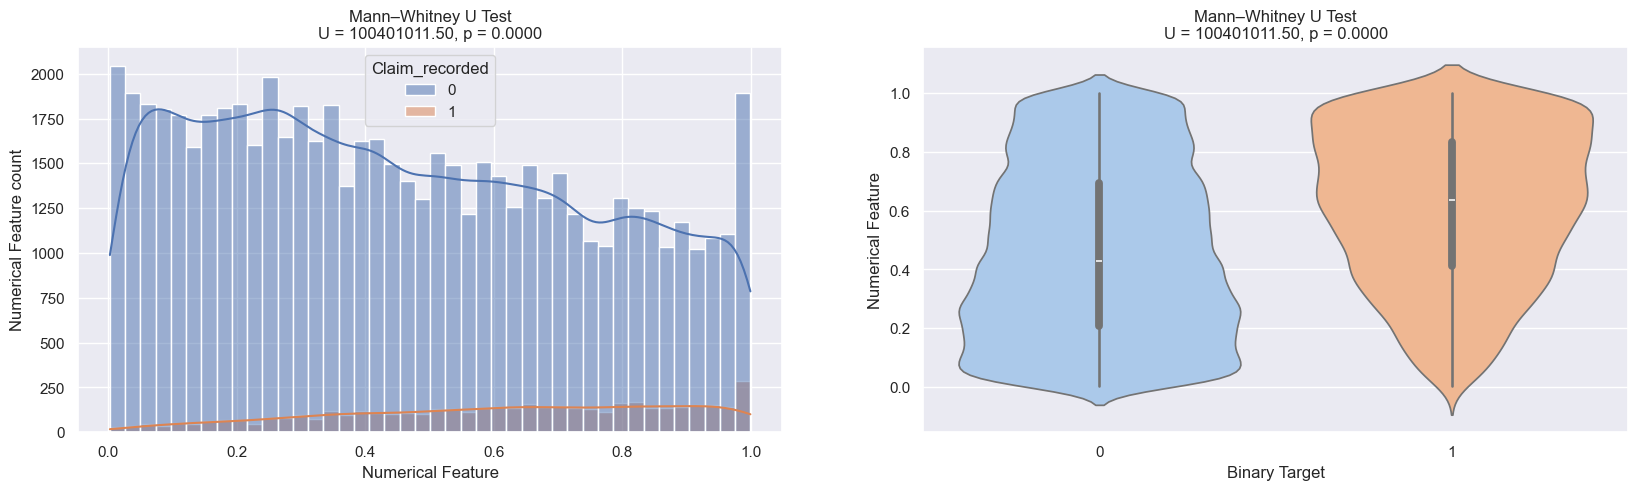

In [176]:
mannwhitneyu_func(Dataset=df_copy,Binarytarget="Claim_recorded",NumericalFeature="Exposure")

W = 0.000, p = 0.000
Reject H₀ → There is significant distribution difference between Claim_recorded & Severity


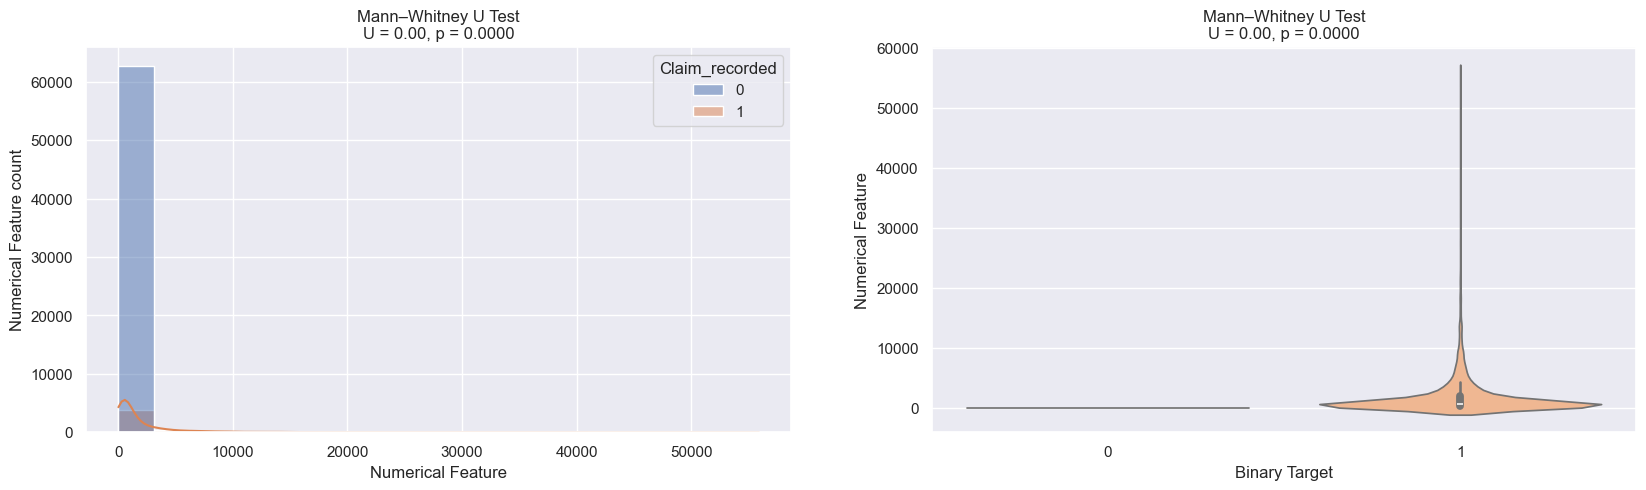

In [177]:
mannwhitneyu_func(Dataset=df_copy,Binarytarget="Claim_recorded",NumericalFeature="Severity")

W = 136037026.500, p = 0.000
Reject H₀ → There is significant distribution difference between Claim_recorded & Veh_value


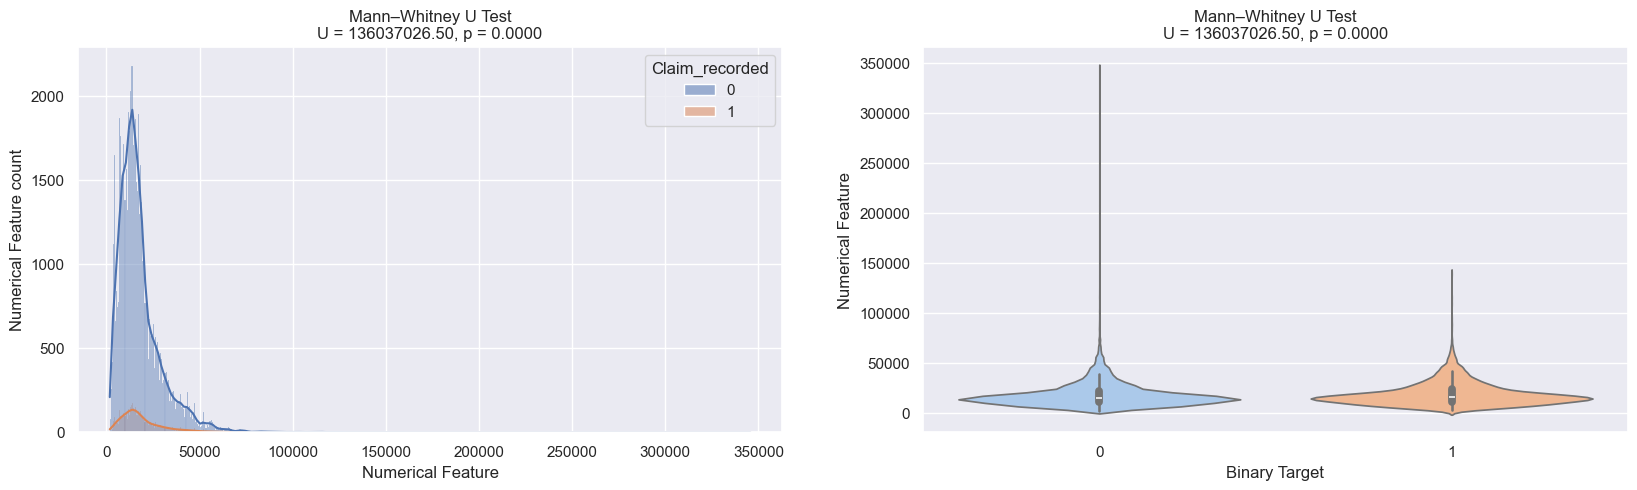

In [178]:
mannwhitneyu_func(Dataset=df_copy,Binarytarget="Claim_recorded",NumericalFeature="Veh_value")